In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import colors
import seaborn as sns; sns.set()

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

import pandas as pd

np.random.seed(12345)

In [2]:
# iris データを読み込んで諸元を表示してみる
iris = datasets.load_iris()

#
print(iris['DESCR'])

# データの各次元の意味
print(iris['feature_names'])

# 各クラスラベル
print(iris['target_names'])

# データを最初の10個分表示してみる
print(iris['data'][:10])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# データをデータフレーム化しておこう

Xdat = iris['data']

# 各クラスの名前リストを作っておこう
clsdat = [iris['target_names'][cid] for cid in iris['target']]

dfDat = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
dfCls = pd.DataFrame(data=clsdat, columns=['Class'])

# データフレームを結合しておく
df = pd.concat([dfCls, dfDat], axis=1)
df

,Class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


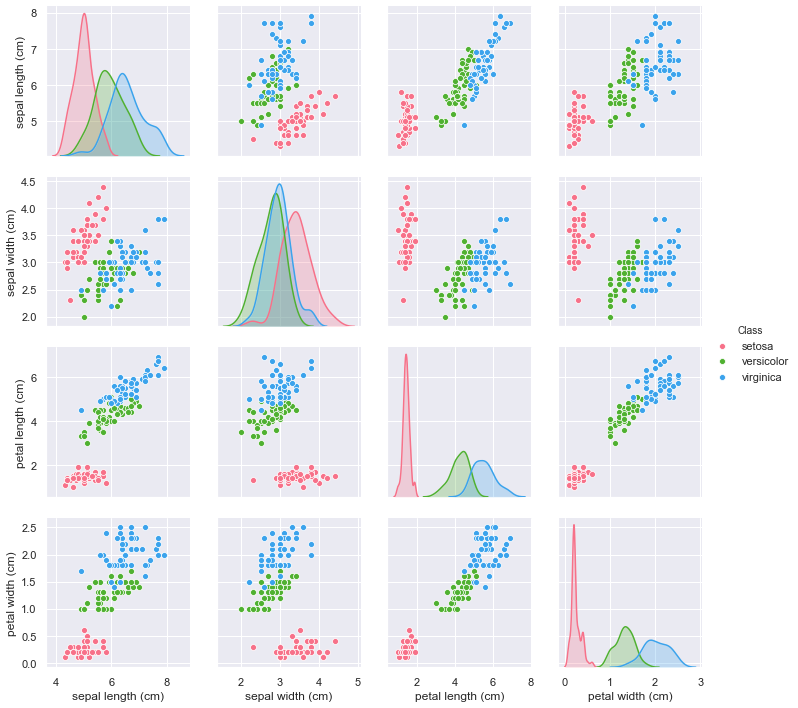

In [4]:
# 可視化してみる
sns.pairplot(df, hue='Class', palette="husl")

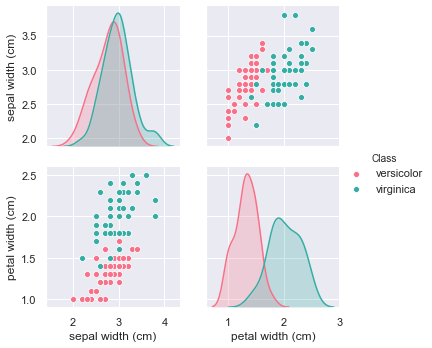

In [5]:
# 'setosa' を除外した2クラスで特徴量を絞ってのデータフレームを作って散布図をとってみる
# 0, 1, 3 はカラム指定で第０カラムがクラス名，第１，第３が所望の特徴量
df2 = df[df['Class'] != 'setosa'].iloc[:, [0, 2, 4]]

sns.pairplot(df2, hue='Class', palette="husl")

In [7]:
X = df2.iloc[:, 1:].values
ydum = pd.get_dummies(df2.iloc[:, 0]).values
y = 2 * ydum[:, 0].astype(int) - 1

Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.4)

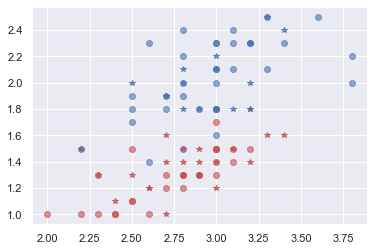

In [8]:
# データが所望の型になっているか確認
plt.plot(Xtrn[ytrn==1, 0], Xtrn[ytrn==1, 1], 'ro', alpha=0.6)
plt.plot(Xtrn[ytrn==-1, 0], Xtrn[ytrn==-1, 1], 'bo', alpha=0.6)
plt.plot(Xtst[ytst==1, 0], Xtst[ytst==1, 1], 'r*', alpha=0.8)
plt.plot(Xtst[ytst==-1, 0], Xtst[ytst==-1, 1], 'b*', alpha=0.8)

In [9]:
print('学習データの幅', Xtrn.max(axis=0) - Xtrn.min(axis=0))
print('学習データの中心', Xtrn.mean(axis=0))

学習データの幅 [1.8 1.5]
学習データの中心 [2.86333333 1.70166667]


In [10]:
Etrx = Xtrn.mean(axis=0)
Xtrain = (Xtrn - Etrx) 

print('学習データの幅（補正後）', Xtrain.max(axis=0) - Xtrain.min(axis=0))
print('学習データの中心（補正後）', Xtrain.mean(axis=0))

# テストデータの方も補正しておこう

Xtest = (Xtst - Etrx) 

print('評価データの幅（補正後）', Xtest.max(axis=0) - Xtest.min(axis=0))
print('評価データの中心（補正後）', Xtest.mean(axis=0))

学習データの幅（補正後） [1.8 1.5]
学習データの中心（補正後） [4.81096644e-16 2.18343862e-16]
評価データの幅（補正後） [1.2 1.5]
評価データの中心（補正後） [ 0.02166667 -0.06416667]


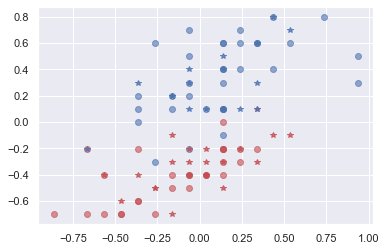

In [11]:
ytrain = ytrn
ytest = ytst

plt.plot(Xtrain[ytrain==1, 0], Xtrain[ytrain==1, 1], 'ro', alpha=0.6)
plt.plot(Xtrain[ytrain==-1, 0], Xtrain[ytrain==-1, 1], 'bo', alpha=0.6)
plt.plot(Xtest[ytest==1, 0], Xtest[ytest==1, 1], 'r*', alpha=0.8)
plt.plot(Xtest[ytest==-1, 0], Xtest[ytest==-1, 1], 'b*', alpha=0.8)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

# 実質２行くらい
yerr = np.count_nonzero(ypred - ytest)

print('誤り個数', yerr)

誤り個数 2


Text(0.5, 1.0, 'Fisher LDA Classification result')

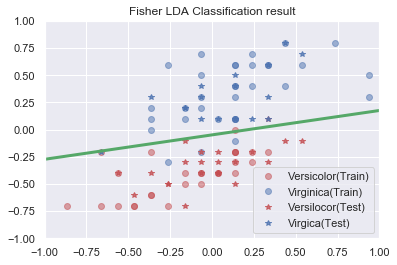

In [23]:
plt.plot(Xtrain[ytrain==1, 0], Xtrain[ytrain==1, 1], 'ro', alpha=0.5, label='Versicolor(Train)')
plt.plot(Xtrain[ytrain!=1, 0], Xtrain[ytrain!=1, 1], 'bo', alpha=0.5, label='Virginica(Train)')
plt.plot(Xtest[ytest==1, 0], Xtest[ytest==1, 1], 'r*', alpha=0.8, label='Versilocor(Test)')
plt.plot(Xtest[ytest!=1, 0], Xtest[ytest!=1, 1], 'b*', alpha=0.8, label='Virgica(Test)')

w = clf.coef_[0]
w0 = clf.intercept_
xx1 = np.linspace(-2, 2)
xx2 = (w[0] * xx1 + w0) / (-w[1])
plt.plot(xx1, xx2, 'g-', linewidth=3)

plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Fisher LDA Classification result')

In [27]:
from sklearn.linear_model import LogisticRegression

# sklearn のロジスティック回帰は L2 正則化が入っていて，これの効きの大きさの逆数をパラメータCで与える
clf = LogisticRegression(C=1000)
clf.fit(Xtrain, ytrain)

w = np.array([clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]])
print(w / np.sqrt(w @ w))

[-0.10717518  0.13364515 -0.98521696]


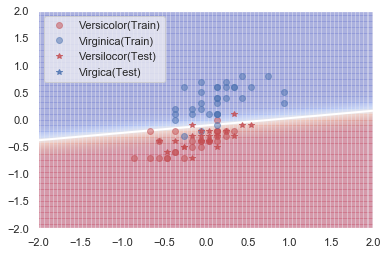

In [28]:
fig = plt.figure()
plt.xlim(-2, 2)
plt.ylim(-2, 2) 

drawprob(w, xrng=(-2, 2), yrng=(-2, 2))

# データ点の描画
plt.plot(Xtrain[ytrain==1, 0], Xtrain[ytrain==1, 1], 'ro', alpha=0.5, label='Versicolor(Train)')
plt.plot(Xtrain[ytrain!=1, 0], Xtrain[ytrain!=1, 1], 'bo', alpha=0.5, label='Virginica(Train)')
plt.plot(Xtest[ytest==1, 0], Xtest[ytest==1, 1], 'r*', alpha=0.8, label='Versilocor(Test)')
plt.plot(Xtest[ytest==0, 0], Xtest[ytest==0, 1], 'b*', alpha=0.8, label='Virgica(Test)')

plt.legend()